### Задание
Дан небольшой файл "russian\_weather.txt", в каждой строке которого через ";" записаны сначала лейбл (текстовая строка), а затем N вещественных чисел.

Пример строки (N=5):

Numbers;1.1;1.2;1.3;1.4;1.5;

В выданном файле N = 114, строка означает российский город, а числа --- температуру с 1980 по 1990 год с некоторым периодом.
Требуется написать python-скрипт, который
1. считывает числовые данные в numpy array с dtype=float и сохраняет в отдельном списке лейблы (в том же порядке);
1. рассматривая строки как функции (со 114 значениями), строит их всех на одном графике. На графике желательно подписать оси (например, "Город"--"Температуры"), название, а также легенду (указывающую названия городов каждой линии, для этого их и надо сохранить в список).

[Только сегодня и только сейчас] Можно пользоваться интернетом!

Данные (для тестирования кода) лежат в ваших папках.

Если у кого-то (вдруг) осталось время, подумайте, какие выводы можно сделать по графику и напишите внизу ответа

__Решение нужно целиком скопировать в гугл-форму:__
http://goo.gl/forms/sPoi3BNn5Z

И отправить!

__</здесь заканчивается текст, который был выдан ранее>__

### Чуть-чуть о python

Самые используемые структуры python: list [], dictinary {}, tuple (), set() 

Предполагается, что вы должны владеть основными приемами работы с ними

В питоне большинство действий можно выполнить кодом в одну строку; и вообще код должен быть компактным

Очень способствует краткости кода [list_comprehension](http://www.secnetix.de/olli/Python/list_comprehensions.hawk).

In [39]:
l1 = [3**i for i in range(10)]
print l1
l2 = [3**i for i in range(10) if i % 3 == 0]
print l2
# Такая же штука работает со всеми структурами!
d1 = {3**i:i for i in range(10)}
print d1
print [c for c in "hello"]

[1, 3, 9, 27, 81, 243, 729, 2187, 6561, 19683]
[1, 27, 729, 19683]
{1: 0, 3: 1, 6561: 8, 9: 2, 2187: 7, 81: 4, 243: 5, 19683: 9, 729: 6, 27: 3}
['h', 'e', 'l', 'l', 'o']


Чтобы соединять или размножать списки, можно использовать их сложение и умножение (перегруженные операции).

Полезными также оказываются операции +=, *=

In [31]:
print l1*5
print l1 + l2
l1 += l2 # то же самое, что l1 = l1 + l2
print l1
l2 *= 3 
print l2
# Добавление нового элемента можно записать в виде прибавления списка из одного элемента:
print l1 + [111]
l1.append(111)
print l1

[1, 3, 9, 27, 81, 243, 729, 2187, 6561, 19683, 1, 27, 729, 19683, 1, 27, 729, 19683, 1, 3, 9, 27, 81, 243, 729, 2187, 6561, 19683, 1, 27, 729, 19683, 1, 27, 729, 19683, 1, 3, 9, 27, 81, 243, 729, 2187, 6561, 19683, 1, 27, 729, 19683, 1, 27, 729, 19683, 1, 3, 9, 27, 81, 243, 729, 2187, 6561, 19683, 1, 27, 729, 19683, 1, 27, 729, 19683, 1, 3, 9, 27, 81, 243, 729, 2187, 6561, 19683, 1, 27, 729, 19683, 1, 27, 729, 19683]
[1, 3, 9, 27, 81, 243, 729, 2187, 6561, 19683, 1, 27, 729, 19683, 1, 27, 729, 19683, 1, 27, 729, 19683, 1, 27, 729, 19683, 1, 27, 729, 19683]
[1, 3, 9, 27, 81, 243, 729, 2187, 6561, 19683, 1, 27, 729, 19683, 1, 27, 729, 19683, 1, 27, 729, 19683, 1, 27, 729, 19683, 1, 27, 729, 19683]
[1, 27, 729, 19683, 1, 27, 729, 19683, 1, 27, 729, 19683, 1, 27, 729, 19683, 1, 27, 729, 19683, 1, 27, 729, 19683, 1, 27, 729, 19683, 1, 27, 729, 19683, 1, 27, 729, 19683]
[1, 3, 9, 27, 81, 243, 729, 2187, 6561, 19683, 1, 27, 729, 19683, 1, 27, 729, 19683, 1, 27, 729, 19683, 1, 27, 729, 19683, 

Из списков, целиком состоящих из строк, можно составить одну с трок с помощью функции join.

Аналогично, строку можно превратить в список из строк с помощью функции split

In [37]:
l = ["lets", "play", "game"]
ll = "!!! ".join(l)
print ll
print ll.split("!!! ")
# А если список состоит не только из строк, используем list comprehension
print "->".join([str(elem) for elem in l2]) # Опять все в одну строчку!

lets!!! play!!! game
['lets', 'play', 'game']
1->27->729->19683->1->27->729->19683->1->27->729->19683->1->27->729->19683->1->27->729->19683->1->27->729->19683->1->27->729->19683->1->27->729->19683->1->27->729->19683


Не забываем про slicing: с его помощью очень удобно выбирать элементы из списка. Кроме того, можно использовать отрицательные индексы для отсчета с конца строки. 

Общий вид slicing - start:end:step (любой из них может быть пропущен, или последний блок может быть совсем опущен - start:end)

In [42]:
long_word = "comprehension"
print long_word[1:5], long_word[1:-1], long_word[1:-1:2]
# если step < 0 => выбор элементов в обратном порядке
print long_word[::-1]
# и конечно же, это работает и со списками
print l1[::5]

ompr omprehensio opeeso
noisneherpmoc
[1, 243]


Если вам нужно в цикле иметь и индекс элемента, и сам элемент, можно воспользоваться функцией enumerate:

In [1]:
x_list = [2*i for i in range(10)]
for x_idx, x in enumerate(x_list):
    print x_idx, x, x_list[x_idx]

0 0 0
1 2 2
2 4 4
3 6 6
4 8 8
5 10 10
6 12 12
7 14 14
8 16 16
9 18 18


Чтобы не нужно было закрывать файлы, можно использовать конструкцию with:

In [54]:
with open("russian_weather.txt") as f:
    f.read()
    pass
# тут файл уже закрыт
f.read()

ValueError: I/O operation on closed file

Кому интересны еще классные трюки python, можно почитать 
эту статью:

http://idzaaus.org/static/files/articles/Python_Tips,_Tricks,_and%20Hacks_(rus).pdf

### Решение

In [2]:
# Можно импортировать только два модуля:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

In [3]:
# парсим входной файл
cities = []
data = []
with open("russian_weather.txt") as f:
    for line in f:
        values = line.split(";")[:-1] # последняя ; дает лишний пустой элемент
        cities.append(values[0]) # из списка достаем нулевой элемент - город
        data.append([float(elem) for elem in values[1:]]) # все остальные преобразуем во float!
data_array = np.array(data)
data_array.shape, data_array.dtype #нигде в коде не используется информация из файла, даже число строк или столбцов!

((4L, 114L), dtype('float64'))

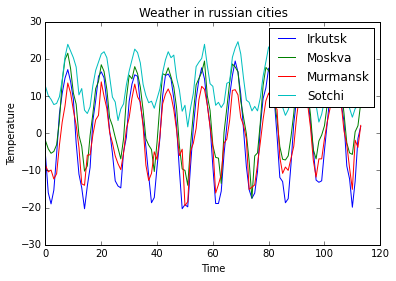

In [4]:
for city_idx, city_array in enumerate(data_array): # строим график для каждого города отдельно
    plt.plot(city_array, label=cities[city_idx])
plt.title("Weather in russian cities")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()

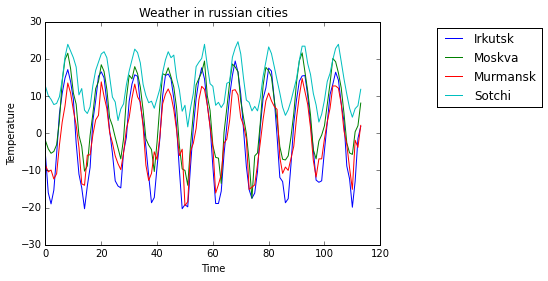

In [5]:
# Легенду можно поставить в другое место.
# Простой вариант: указать loc = {число от 1 до 9}. Тогда она будет переставляться в разные места графика
# Вариант сложнее: подобрать координаты, где легенда будет смотреться лучше всего. 
# В этом случае ее можно вынести за границы графика
for city_idx, city_array in enumerate(data_array): # строим график для каждого города отдельно
    plt.plot(city_array, label=cities[city_idx])
plt.title("Weather in russian cities")
plt.xlabel("Time")
plt.ylabel("Temperature")
#plt.legend(loc=3)
plt.legend(bbox_to_anchor=(1.5, 1))

### Решение через pandas (приводится для общей информации)

In [13]:
import pandas

In [18]:
data = pandas.read_csv("russian_weather.txt", sep=";", index_col=0, header=None)

In [19]:
data

,1,2,3,4,5,6,7,8,9,10,...,106,107,108,109,110,111,112,113,114,115
0,,,,,,,,,,,,,,,,,,,,,
Irkutsk,-5.9,-16.0,-19.0,-15.3,-5.6,5.2,10.7,14.8,17.1,13.9,...,14.3,8.0,3.1,-8.8,-12.3,-19.9,-12.9,-1.4,1.8,NaN
Moskva,-2.0,-4.2,-5.4,-4.9,-3.1,3.3,14.0,19.8,21.5,17.4,...,16.2,12.2,5.3,-2.6,-5.3,-5.7,0.4,2.0,8.1,NaN
Murmansk,-8.6,-10.4,-9.9,-12.3,-10.9,-3.2,3.0,7.3,13.5,10.8,...,12.1,7.9,0.6,-3.0,-9.4,-15.1,-1.9,-3.8,2.1,NaN
Sotchi,12.6,10.1,9.1,7.7,8.0,9.8,14.3,20.5,23.9,22.1,...,23.9,19.3,14.6,10.5,6.7,4.3,6.6,7.4,11.8,NaN


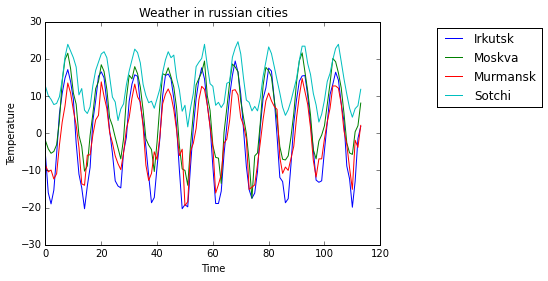

In [21]:
for city_idx in range(data.shape[0]): # строим график для каждого города отдельно
    plt.plot(data.values[city_idx][:-1], label=data.index[city_idx]) # снова убираем последнее пустое значение
plt.title("Weather in russian cities")
plt.xlabel("Time")
plt.ylabel("Temperature")
#plt.legend(loc=3)
plt.legend(bbox_to_anchor=(1.5, 1))